In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\users\prishitaray\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.contrib.layers import fully_connected

In [3]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [4]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [5]:
training_data.shape

(175341, 45)

In [6]:
training_labels=training_data[:,43]

In [7]:
training_features=training_data[:,0:43]

In [8]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [9]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [10]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [11]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [12]:
proto=np.unique(training_features[:,2])

In [13]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [14]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [15]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [16]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [17]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [18]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [19]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [20]:
d=dict.fromkeys(proto)

In [21]:
l=d.keys()

In [22]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [23]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [24]:
training_features

array([[1, 0.121478, 29, ..., 1, 1, 0],
       [2, 0.6499020000000001, 29, ..., 1, 6, 0],
       [3, 1.623129, 29, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 115, ..., 3, 12, 0],
       [175340, 9e-06, 115, ..., 30, 30, 0],
       [175341, 9e-06, 115, ..., 30, 30, 0]], dtype=object)

In [25]:
training_features[:,2]

array([29, 29, 29, ..., 115, 115, 115], dtype=object)

In [26]:
training_features.shape

(175341, 43)

In [27]:
std_list=[]

In [28]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [29]:
training_features

array([[-1.7320409294122083, -0.1910288091606379, -0.9907313167166802,
        ..., -0.715713656611942, -0.7530740174877311,
        -0.12650796304403503],
       [-1.7320211730425332, -0.10948479464168344, -0.9907313167166802,
        ..., -0.715713656611942, -0.28825700778157093,
        -0.12650796304403503],
       [-1.7320014166728581, 0.04069921785252289, -0.9907313167166802,
        ..., -0.5955425666085573, -0.28825700778157093,
        -0.12650796304403503],
       ...,
       [1.7320014166728581, -0.2097733588018406, 1.0350256394248076, ...,
        -0.4753714766051727, 0.26952340386582113, -0.12650796304403503],
       [1.7320211730425332, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503],
       [1.7320409294122083, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503]],
      dtype=object)

In [30]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [31]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [138]:
lr=0.01
actf=tf.nn.elu

In [139]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [140]:
initializer=tf.variance_scaling_initializer()

In [141]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [142]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [143]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [144]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [145]:
all_weights=[w1]+[w2]+[w3]+[w4]

l1_regularizer=tf.contrib.layers.l1_regularizer(scale=0.005,scope=None)
regularization_penalty=tf.contrib.layers.apply_regularization(l1_regularizer,all_weights)

In [146]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [147]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss+regularization_penalty)

In [148]:
init=tf.global_variables_initializer()

In [149]:
num_epoch=1000
batch_size=10000

In [150]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [151]:
x=[]
y=[]
l=[]

In [152]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.7 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.7327240109443665
epoch 1 loss 0.7733511924743652
epoch 2 loss 0.5928431749343872
epoch 3 loss 0.6862862706184387
epoch 4 loss 0.6263171434402466
epoch 5 loss 0.5861484408378601
epoch 6 loss 0.5671218633651733
epoch 7 loss 0.6100466847419739
epoch 8 loss 0.5052404999732971
epoch 9 loss 0.5262146592140198
epoch 10 loss 0.4909418523311615
epoch 11 loss 0.5228264927864075
epoch 12 loss 0.5082228183746338
epoch 13 loss 0.5415248870849609
epoch 14 loss 0.5056013464927673
epoch 15 loss 0.5171890258789062
epoch 16 loss 0.4600202739238739
epoch 17 loss 0.484622597694397
epoch 18 loss 0.49704650044441223
epoch 19 loss 0.5882412791252136
epoch 20 loss 0.42720428109169006
epoch 21 loss 0.5020518898963928
epoch 22 loss 0.47380128502845764
epoch 23 loss 0.4430537819862366
epoch 24 loss 0.43610697984695435
epoch 25 loss 0.4433991611003876
epoch 26 loss 0.4501275420188904
epoch 27 loss 0.4090345799922943
epoch 28 loss 0.4747012257575989
epoch 29 loss 0.42833206057548523
epoch 30 loss 0.

epoch 243 loss 0.41698893904685974
epoch 244 loss 0.4367605447769165
epoch 245 loss 0.4190729558467865
epoch 246 loss 0.4394509494304657
epoch 247 loss 0.37716686725616455
epoch 248 loss 0.3655872941017151
epoch 249 loss 0.4102691113948822
epoch 250 loss 0.3603997826576233
epoch 251 loss 0.3877776861190796
epoch 252 loss 0.4167785346508026
epoch 253 loss 0.41131168603897095
epoch 254 loss 0.4446445405483246
epoch 255 loss 0.40399694442749023
epoch 256 loss 0.39671897888183594
epoch 257 loss 0.42029327154159546
epoch 258 loss 0.430274099111557
epoch 259 loss 0.3978855013847351
epoch 260 loss 0.44113925099372864
epoch 261 loss 0.4432826340198517
epoch 262 loss 0.4669448435306549
epoch 263 loss 0.39668071269989014
epoch 264 loss 0.40366002917289734
epoch 265 loss 0.3846625089645386
epoch 266 loss 0.42245006561279297
epoch 267 loss 0.39226290583610535
epoch 268 loss 0.41455894708633423
epoch 269 loss 0.43799665570259094
epoch 270 loss 0.3782411217689514
epoch 271 loss 0.4963320195674896
ep

epoch 482 loss 0.41741934418678284
epoch 483 loss 0.4749150574207306
epoch 484 loss 0.4182315766811371
epoch 485 loss 0.38458800315856934
epoch 486 loss 0.46506163477897644
epoch 487 loss 0.38228267431259155
epoch 488 loss 0.3861037492752075
epoch 489 loss 0.45526859164237976
epoch 490 loss 0.38780269026756287
epoch 491 loss 0.4109727442264557
epoch 492 loss 0.3953878581523895
epoch 493 loss 0.39456838369369507
epoch 494 loss 0.3938945531845093
epoch 495 loss 0.39349010586738586
epoch 496 loss 0.43064233660697937
epoch 497 loss 0.45517855882644653
epoch 498 loss 0.4695543944835663
epoch 499 loss 0.40720120072364807
epoch 500 loss 0.41585201025009155
epoch 501 loss 0.40894606709480286
epoch 502 loss 0.41622552275657654
epoch 503 loss 0.4132407605648041
epoch 504 loss 0.3705684244632721
epoch 505 loss 0.3647996485233307
epoch 506 loss 0.4741871953010559
epoch 507 loss 0.49897122383117676
epoch 508 loss 0.39995160698890686
epoch 509 loss 0.4167715013027191
epoch 510 loss 0.464877277612686

epoch 721 loss 0.4165661633014679
epoch 722 loss 0.4269033372402191
epoch 723 loss 0.4167472720146179
epoch 724 loss 0.4333062469959259
epoch 725 loss 0.5441926717758179
epoch 726 loss 0.39518114924430847
epoch 727 loss 0.445576012134552
epoch 728 loss 0.3724561035633087
epoch 729 loss 0.41301557421684265
epoch 730 loss 0.5348449945449829
epoch 731 loss 0.42959967255592346
epoch 732 loss 0.5095622539520264
epoch 733 loss 0.42106714844703674
epoch 734 loss 0.42942407727241516
epoch 735 loss 0.5001863837242126
epoch 736 loss 0.48538315296173096
epoch 737 loss 0.4314138889312744
epoch 738 loss 0.5042009949684143
epoch 739 loss 0.42112746834754944
epoch 740 loss 0.4002973139286041
epoch 741 loss 0.40834811329841614
epoch 742 loss 0.4097459316253662
epoch 743 loss 0.41836875677108765
epoch 744 loss 0.426216721534729
epoch 745 loss 0.46363601088523865
epoch 746 loss 0.4127078354358673
epoch 747 loss 0.4024282693862915
epoch 748 loss 0.5090873837471008
epoch 749 loss 0.40733659267425537
epoch

epoch 960 loss 0.40016940236091614
epoch 961 loss 0.4043353199958801
epoch 962 loss 0.46034562587738037
epoch 963 loss 0.40740829706192017
epoch 964 loss 0.38991454243659973
epoch 965 loss 0.43091511726379395
epoch 966 loss 0.3960720896720886
epoch 967 loss 0.396470308303833
epoch 968 loss 0.40342921018600464
epoch 969 loss 0.4077211022377014
epoch 970 loss 0.3925383687019348
epoch 971 loss 0.40553489327430725
epoch 972 loss 0.39613625407218933
epoch 973 loss 0.41274818778038025
epoch 974 loss 0.42148858308792114
epoch 975 loss 0.3945547342300415
epoch 976 loss 0.414101779460907
epoch 977 loss 0.4355303645133972
epoch 978 loss 0.40229275822639465
epoch 979 loss 0.3976730704307556
epoch 980 loss 0.39183491468429565
epoch 981 loss 0.40851953625679016
epoch 982 loss 0.5569257140159607
epoch 983 loss 0.500502347946167
epoch 984 loss 0.47010502219200134
epoch 985 loss 0.38421109318733215
epoch 986 loss 0.4180507957935333
epoch 987 loss 0.37348002195358276
epoch 988 loss 0.4281463623046875
e

In [165]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [166]:
sum_weights

[-0.12018430000171065,
 -0.791016127448529,
 -0.2364310584962368,
 0.6206535177771002,
 0.9202842032536864,
 0.4220359332393855,
 0.5839440382696921,
 0.6087501039728522,
 -1.0859556049108505,
 -0.24213212088216096,
 -0.23506609816104174,
 -0.4382227547466755,
 -1.0486566666513681,
 -0.46695516165345907,
 0.9645022675395012,
 -0.47106707841157913,
 -0.6879628198221326,
 0.13910785410553217,
 -0.19455045461654663,
 0.8649437570129521,
 0.6268596103182063,
 0.4355735434219241,
 -0.5842368865851313,
 -0.3872601722832769,
 1.0954160941764712,
 0.6992498571053147,
 -0.68544348096475,
 -0.3962690788321197,
 -0.2093168959254399,
 -0.2665625415975228,
 -0.8107275692746043,
 -0.09860515355831012,
 -0.2685765130445361,
 -0.5108942896476947,
 -0.4442075896076858,
 -0.6779344277456403,
 -0.5903193885460496,
 -0.45522301737219095,
 0.13296694005839527,
 -0.3068385850638151,
 -0.6599021600559354,
 -0.3959840089082718,
 0.8947758818976581]

In [167]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [168]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=std_list[i]*sum_weights[i]
    var_imp.append(prod)

In [169]:
var_imp

[-6083.319049928975,
 -5.125966738290787,
 -10.037270744169279,
 1.4306957918886667,
 0.79875092521869,
 57.77131996926762,
 64.3844761774443,
 106388.30076753582,
 -156001.65804567945,
 -40048.77550680398,
 -24.197637741809455,
 -48.42648390671579,
 -197521729.2575105,
 -1130641.093773993,
 63.6618470880281,
 -24.840709077041318,
 -4982.381662838297,
 137.31202456445004,
 -8748.100936455125,
 3512.5640165420787,
 79.61158549220286,
 590315567.9819353,
 -791054223.5552926,
 -49.13795916925496,
 0.08692536999972517,
 0.030347205878423412,
 -0.027764738424650992,
 -81.10707745717549,
 -54.06997013824713,
 -0.20709472320754654,
 -43947.76823825957,
 -1.055499213885561,
 -0.2563303311458873,
 -4.1139524708134765,
 -3.574574565635083,
 -3.920880248050654,
 -6.467630326912036,
 -0.05737980884037969,
 0.01676017536785263,
 -0.21515693634941477,
 -5.491355367063321,
 -4.2595688264355696,
 0.11141318804574188]

In [188]:
features=list(range(1,44))

In [198]:
plt.rcParams['figure.figsize']=(20,800)

In [199]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")


Text(0,0.5,'Feature Importance Values')

In [173]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [174]:
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [175]:
for x in best_features:
    print(feature_names[x])

stcpb
sbytes
djit
dinpkt
swin
dpkts
sloss
spkts
service
state


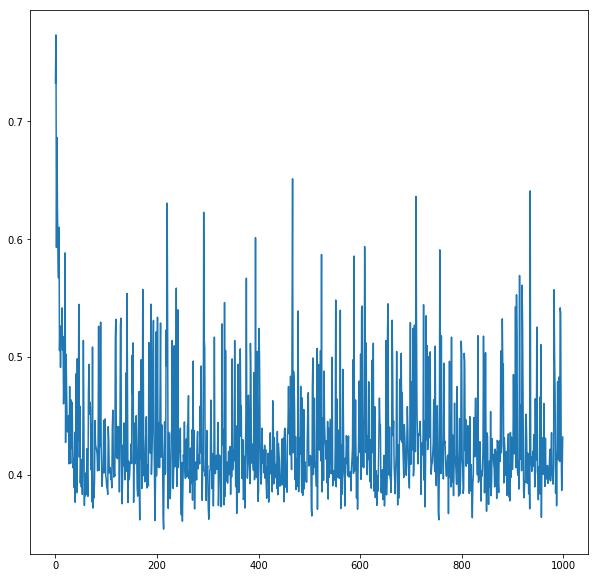

In [186]:
plt.rcParams['figure.figsize']=(10,10)
x=list(range(0,1000))
plt.plot(x,y)

In [187]:
print(np.var(var_imp))

2.347774448044601e+16
